In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import coint
import scipy
import yfinance as yf


In [16]:
tickers = ["KO", "PEP"]  # Coca-Cola and Pepsi
start_date = "2015-01-01"
end_date = "2023-12-31"

# Download data
data = yf.download(tickers, start=start_date, end=end_date)["Close"]

# Preview the data
print(data.head())


[*********************100%***********************]  2 of 2 completed

Ticker             KO        PEP
Date                            
2015-01-02  30.662113  70.597336
2015-01-05  30.662113  70.066589
2015-01-06  30.894966  69.535805
2015-01-07  31.280592  71.569130
2015-01-08  31.658966  72.869850


<Figure size 1000x600 with 0 Axes>

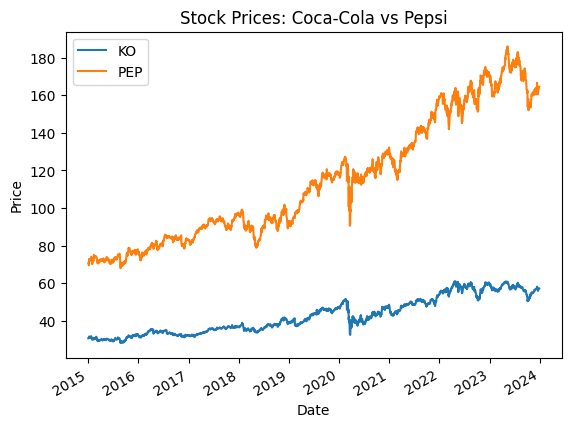

In [ ]:
plt.figure(figsize=(10, 6))
data.plot(title="Stock Prices: Coca-Cola vs Pepsi", xlabel="Date", ylabel="Price")
plt.legend(tickers)
plt.show()


Correlation Matrix:
 Ticker        KO       PEP
Ticker                    
KO      1.000000  0.980195
PEP     0.980195  1.000000


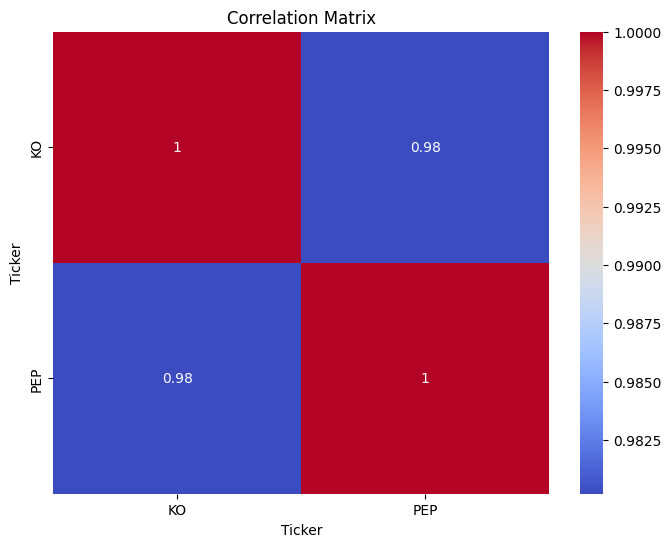

In [18]:
correlation = data.corr()
print("Correlation Matrix:\n", correlation)

# Heatmap of correlation
plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap="coolwarm", cbar=True)
plt.title("Correlation Matrix")
plt.show()


In [19]:
score, p_value, _ = coint(data["KO"], data["PEP"])

print(f"Cointegration Test p-value: {p_value:.4f}")
if p_value < 0.05:
    print("The pair is likely cointegrated (p < 0.05).")
else:
    print("The pair is not cointegrated.")


Cointegration Test p-value: 0.0095
The pair is likely cointegrated (p < 0.05).


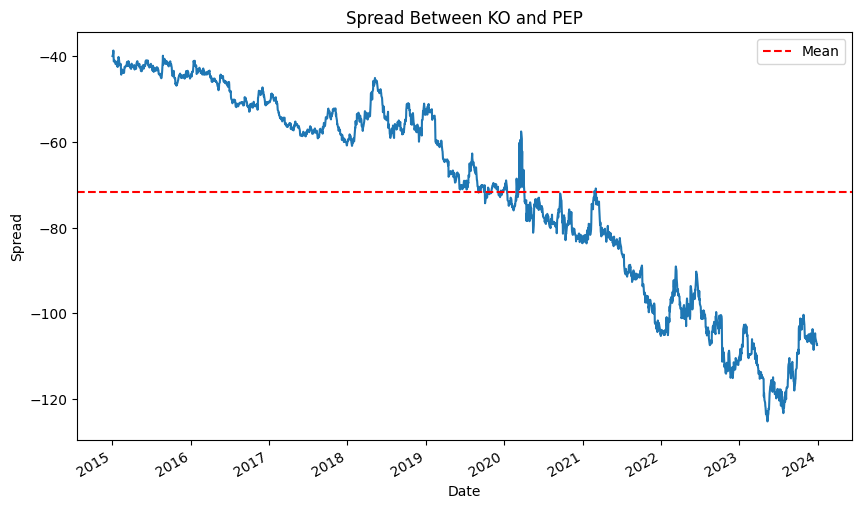

In [20]:
spread = data["KO"] - data["PEP"]

plt.figure(figsize=(10, 6))
spread.plot(title="Spread Between KO and PEP", xlabel="Date", ylabel="Spread")
plt.axhline(spread.mean(), color="red", linestyle="--", label="Mean")
plt.legend()
plt.show()

In [21]:
from statsmodels.tsa.stattools import adfuller

adf_test = adfuller(spread)
print(f"ADF Statistic: {adf_test[0]:.4f}")
print(f"p-value: {adf_test[1]:.4f}")

if adf_test[1] < 0.05:
    print("The spread is stationary (p < 0.05).")
else:
    print("The spread is not stationary.")

ADF Statistic: -0.7556
p-value: 0.8318
The spread is not stationary.
